In [83]:
import pandas as pd
import numpy as np
import streamlit as st
import matplotlib.pyplot as plt
import os
import json

In [84]:
records = []
directory = "./polar_files/"
for filename in os.listdir(directory):
    filepath = os.path.join(directory, filename)
    #Filter out other files than json
    if str(filepath).endswith('.json'):
        #Open each file, load content to "data" (dictionary)
        with open(filepath, "r", encoding="utf-8") as f:
            data = json.load(f)
            #Flattens the nested dictionaries
            flat_data = pd.json_normalize(data['exercises'])
            #make a list item from data
            records.append(flat_data)
#Join all list items into a dataframe
df = pd.concat(records, ignore_index = True)

In [85]:
csv_path = os.path.join(directory, 'general_information.csv')
df.to_csv(csv_path)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   startTime              43 non-null     object 
 1   stopTime               43 non-null     object 
 2   timezoneOffset         43 non-null     int64  
 3   duration               43 non-null     object 
 4   distance               43 non-null     float64
 5   sport                  43 non-null     object 
 6   latitude               43 non-null     float64
 7   longitude              43 non-null     float64
 8   ascent                 42 non-null     float64
 9   descent                43 non-null     float64
 10  kiloCalories           43 non-null     int64  
 11  altitude.min           43 non-null     float64
 12  altitude.avg           43 non-null     float64
 13  altitude.max           43 non-null     float64
 14  heartRate.min          43 non-null     int64  
 15  heartRat

In [87]:
df['startTime'][0]

'2025-03-09T15:07:22.000'

In [88]:
df['startTime'] = pd.to_datetime(df['startTime'], format = '%Y-%m-%dT%H:%M:%S.%f')

In [89]:
df[['startTime','heartRate.max']]

,startTime,heartRate.max
0,2025-03-09 15:07:22,176
1,2025-02-03 18:35:18,152
2,2025-03-15 09:42:07,179
3,2025-03-11 12:28:17,173
4,2025-03-06 11:08:38,151
5,2025-03-04 11:20:12,145
6,2025-02-19 13:15:12,172
7,2025-03-07 10:38:51,178
8,2025-02-17 19:36:58,174
9,2025-02-06 07:47:02,175


In [90]:
df = df.sort_values(by=['startTime'])

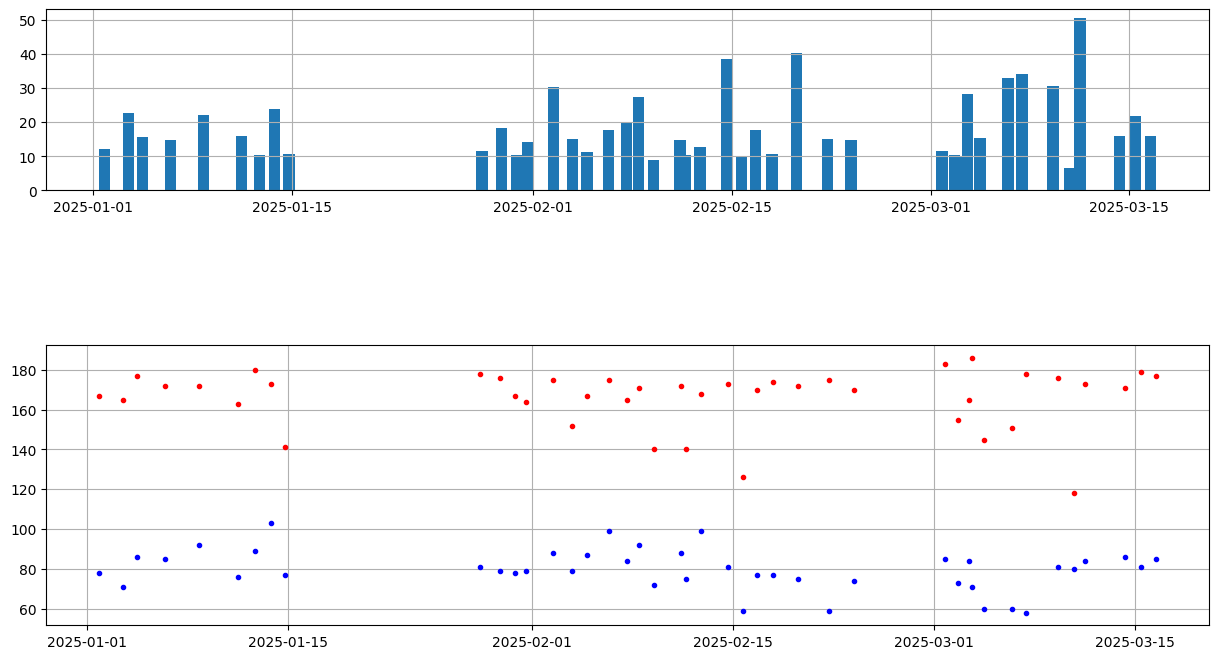

In [91]:
plt.figure(figsize=(15,8))
plt.subplot(3,1,1)
plt.bar(df['startTime'], df['distance'] /1000)
plt.grid()

plt.subplot(2,1,2)
plt.plot(df['startTime'], df['heartRate.min'], 'b .')
plt.plot(df['startTime'], df['heartRate.max'], 'r .')

plt.grid()

#plt.show()